In [6]:
import data_exploration_functions as dexpf
import grouping_curves as grpc
# import genetic_model as gen
# lub
import genetic_model_v2 as gen
import num_and_graph_results as ngr
import libs_set as libs

In [7]:
battery_name = "RW9"
test_battery_name = "RW10"
if battery_name in ["RW9", "RW10", "RW11", "RW12"]:
    data_info, df_rwX = dexpf.mat_to_dataframe('C:/Users/Radek/Desktop/INŻ/Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post/data/Matlab/'+ battery_name + '.mat')
    _, df_rwX_test = dexpf.mat_to_dataframe('C:/Users/Radek/Desktop/INŻ/Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post/data/Matlab/'+ test_battery_name + '.mat') 
else:
    print("Nie ma baterii o takiej nazwie")

In [8]:
df_rwX.head()

,comment,type,relativeTime,time,voltage,current,temperature,date
0,reference charge,C,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[5.04, 15.04, 25.04, 35.04, 45.04, 55.04, 65.0...","[3.838, 3.865, 3.878, 3.888, 3.895, 3.9, 3.905...","[-2.007, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -...","[24.3853, 24.3853, 24.29163, 24.2448, 24.26041...",06-Jan-2014 13:36:43
1,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[10509.699999999999, 10519.7, 10529.7, 10539.6...","[4.113, 4.099, 4.091, 4.085, 4.079, 4.075, 4.0...","[1.004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[22.10602, 22.05919, 22.04357, 22.01235, 21.98...",06-Jan-2014 16:31:49
2,reference charge,C,"[0.03, 10.03, 20.03, 30.03, 40.03, 50.03, 60.0...","[18062.29, 18072.29, 18082.29, 18092.29, 18102...","[3.492, 3.601, 3.651, 3.69, 3.723, 3.751, 3.77...","[-2.01, -2.0, -2.0, -2.0, -2.001, -2.0, -2.0, ...","[27.49199, 27.5076, 27.5076, 27.47638, 27.4451...",06-Jan-2014 18:37:42
3,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[28575.879999999997, 28585.88, 28595.88, 28605...","[4.113, 4.099, 4.091, 4.085, 4.079, 4.074, 4.0...","[1.003, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[22.55875, 22.55875, 22.57436, 22.60559, 22.60...",06-Jan-2014 21:32:56
4,pulsed load (rest),R,"[0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.0...","[46858.079999999994, 46859.079999999994, 46860...","[4.199, 4.199, 4.199, 4.199, 4.199, 4.199, 4.1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[22.99587, 22.98026, 22.98026, 22.98026, 22.98...",07-Jan-2014 02:37:40


In [9]:
data_info

{'procedure': array(['Uniform random walk charge and discharge at room temperature'],
       dtype='<U60'),
 'description': array(['Experiment consisting of repeated iteration of a randomized series of charging and discharging pulses followed by a full recharge to 4.2V. Batteries are charged and discharged at room temperature'],
       dtype='<U195')}

In [10]:
# bateria robocza, wykorzystywana do "uczenia"
df_ref_discharge = dexpf.df_filtered('reference discharge', df_rwX)
df_ref_discharge.reset_index(drop = True, inplace = True)

# bateria testowana
test_df_ref_discharge = dexpf.df_filtered('reference discharge', df_rwX_test)
test_df_ref_discharge.reset_index(drop = True, inplace = True)

n_curves = len(df_ref_discharge) # zapisanie liczby krzywych referencyjnych dla danego pliku (baterii), można uogólnić algorytmy i modele zeby uwzględniały to że może być rózna ilość krzywych 
n_curves_test_battery = len(test_df_ref_discharge) # liczba krzywych referencyjnych dla baterii testowej
print(f'Ilość profili dla baterii roboczej {battery_name}: {n_curves}')
print(f'Ilość profili dla baterii testowej {test_battery_name}: {n_curves_test_battery}')
print(len(df_ref_discharge.loc[70]['relativeTime']))
df_ref_discharge.head(5)

Ilość profili dla baterii roboczej RW9: 80
Ilość profili dla baterii testowej RW10: 77
320


,comment,type,relativeTime,time,voltage,current,temperature,date
0,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[10509.699999999999, 10519.7, 10529.7, 10539.6...","[4.113, 4.099, 4.091, 4.085, 4.079, 4.075, 4.0...","[1.004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[22.10602, 22.05919, 22.04357, 22.01235, 21.98...",06-Jan-2014 16:31:49
1,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[28575.879999999997, 28585.88, 28595.88, 28605...","[4.113, 4.099, 4.091, 4.085, 4.079, 4.074, 4.0...","[1.003, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[22.55875, 22.55875, 22.57436, 22.60559, 22.60...",06-Jan-2014 21:32:56
2,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[427288.81999999995, 427298.82, 427308.82, 427...","[4.11, 4.094, 4.085, 4.077, 4.071, 4.066, 4.06...","[1.005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.001, 1.0, 1...","[22.63681, 22.63681, 22.65242, 22.66803, 22.68...",11-Jan-2014 12:30:19
3,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[446909.27, 446919.26999999996, 446929.27, 446...","[4.109, 4.093, 4.084, 4.076, 4.07, 4.065, 4.06...","[1.006, 0.999, 0.999, 1.0, 1.0, 1.0, 1.001, 1....","[22.15285, 22.16847, 22.18408, 22.2153, 22.230...",11-Jan-2014 17:57:21
4,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[830934.71, 830944.71, 830954.7100000001, 8309...","[4.106, 4.088, 4.078, 4.071, 4.064, 4.058, 4.0...","[1.005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[21.73134, 21.73134, 21.76257, 21.77818, 21.79...",16-Jan-2014 04:50:19


In [11]:
test_df_ref_discharge.head()

,comment,type,relativeTime,time,voltage,current,temperature,date
0,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[1633.73, 1643.73, 1653.73, 1663.73, 1673.73, ...","[4.116, 4.102, 4.094, 4.088, 4.082, 4.077, 4.0...","[1.005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[22.72138, 20.09283, 20.10838, 20.12394, 20.13...",06-Jan-2014 14:03:52
1,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[19672.49, 19682.489999999998, 19692.49, 19702...","[4.116, 4.103, 4.094, 4.088, 4.082, 4.078, 4.0...","[1.001, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1...","[23.2191, 23.23465, 23.26576, 23.29687, 23.312...",06-Jan-2014 19:04:32
2,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[430311.21, 430321.20999999996, 430331.2099999...","[4.112, 4.096, 4.087, 4.079, 4.073, 4.068, 4.0...","[1.004, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1...","[22.09924, 22.09924, 22.09924, 22.1459, 22.177...",11-Jan-2014 13:20:39
3,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[449586.08999999997, 449596.09, 449606.09, 449...","[4.111, 4.095, 4.086, 4.079, 4.073, 4.067, 4.0...","[1.003, 1.0, 1.0, 1.001, 1.0, 1.0, 1.0, 1.0, 1...","[22.30144, 22.30144, 22.31699, 22.33254, 22.34...",11-Jan-2014 18:41:56
4,reference discharge,D,"[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60.0...","[830228.23, 830238.23, 830248.23, 830258.23, 8...","[4.106, 4.088, 4.079, 4.07, 4.064, 4.058, 4.05...","[1.004, 1.0, 1.0, 1.0, 1.001, 1.0, 1.0, 1.0, 0...","[21.57042, 21.58597, 21.58597, 21.60153, 21.61...",16-Jan-2014 04:38:01


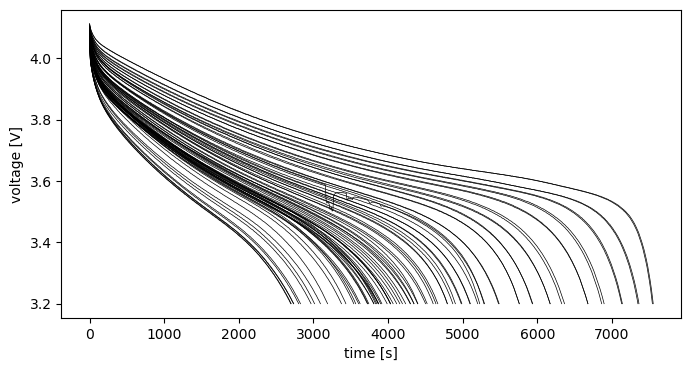

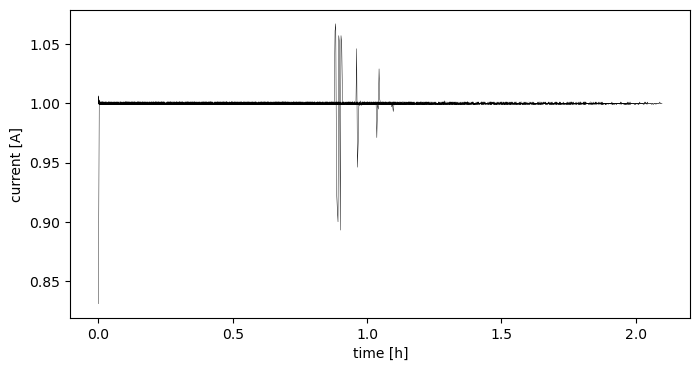

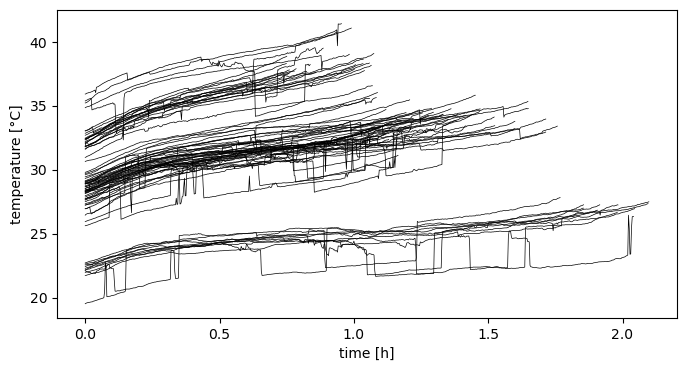

80


In [12]:
dexpf.drawCurves(df_ref_discharge, 0.5, 0.3, 0.5)
print(len(df_ref_discharge))

In [13]:
processed_curves_indexes = libs.random.sample(range(0, n_curves), n_curves) # wylosowanie indeksów krzywych do przetwarzania (jest ich 80, 77 lub 76 w zalezności od pliku), przedział [0, n_curves), losujemy wybraną ilość
# liczb z tego przedziału 
all_curves_indexes = range(0, n_curves) # wszystkie indeksy krzywych
test_curves_indexes = [i for i in all_curves_indexes if i not in processed_curves_indexes] # pozostałe indeksy krzywych (testowych)

print(test_curves_indexes)
polynomial_degree = 5

# zwracamy zakresy współczynników dla poszczególnych grup oraz wartości parametru SOH dla każdego profilu napięcia
coeffs_ranges_groups, SOHs = grpc.FitPolynomialsAndRealCurves(df_ref_discharge, polynomial_degree, processed_curves_indexes, create_groups=True)

for elem in coeffs_ranges_groups:
    print(elem)
    print()

# wyznaczenie kolejno ogólnych zakresów współczynników, współczynników wielomianu wybranego stopnia najlepszego dopasowania do przetwarzanych profili
# napięć baterii "uczącej" oraz grupy współczynników, gdzie dana grupa zawiera współczynniki przy tym samym członie z każdego wielomianu
coeffs_ranges, allSetsOfCoeffs, coeffs_grouped = grpc.FitPolynomialsAndRealCurves(df_ref_discharge, polynomial_degree, processed_curves_indexes) #, show_polynomials=True, draw_graphs=True)

# ogólne zakresy współczynników dla kolejnych członów wielomianu (od członu o najwyższej potędze do wyrazu wolnego)
for cff_range in coeffs_ranges:
    print(cff_range)    
# print(coeffs_grouped)
print()

# zakresy parametru SOH dla krzywych podzielonych na 8 grup
Cap = []
for index, row in df_ref_discharge.iterrows():
    Cap.append(libs.np.trapz(row['current'], row['relativeTime']) / 3600)

# pogrupowanie krzywych na 8 grup
# grupy wartości SOH
groups = []
for i in range(8):
    groups.append((Cap[(10*i) : (10*i+10)]) / Cap[0])
    
print(groups)
print()

# wyznaczone zakresy SOH, ale ostatecznie zdefiniowano je ręcznie w funkcji 'specifyGroup' w pliku 'grouping_curves' aby zachować ciągłość kolejnych
# przedziałów
SOH_ranges = []
for grp in groups:
    SOH_ranges.append( (min(grp), max(grp)) )
for elem in SOH_ranges:
    print(elem)


[]
[(-5.168373370208733e-19, -4.316511972498285e-19), (7.168418842487024e-15, 8.395291268261134e-15), (-4.9533721688172037e-11, -4.304580334773229e-11), (1.2225229976212163e-07, 1.3789385105518824e-07), (-0.0002709243094013182, -0.0002524859179642217), (4.080489589259574, 4.092979865848069)]

[(-6.873286655365306e-19, -5.903901296408514e-19), (9.28349295459247e-15, 1.0375386693741974e-14), (-5.744566434292302e-11, -5.322234120975744e-11), (1.4461335505732636e-07, 1.519440786657443e-07), (-0.0002861396243791358, -0.0002776027953741864), (4.065335799782686, 4.0732777206296)]

[(-9.51150763366154e-19, -7.224643804706416e-19), (1.0603125800560897e-14, 1.299420258650159e-14), (-6.632262577451254e-11, -5.746718907598291e-11), (1.5063131645470574e-07, 1.6553568337426145e-07), (-0.0003037834575078883, -0.0002876366032291242), (4.045494803223414, 4.059264286110698)]

[(-2.26620594850943e-18, -1.1008225074730956e-18), (1.4560072203734795e-14, 2.755702349614191e-14), (-1.2380996857877e-10, -7.141

In [14]:
n_indexes = 10
# testowane krzywe
random_indexes = [0, 18, 36, 54, 72] # sorted(libs.random.sample(range(0, n_curves_test_battery), n_indexes))
print(random_indexes)

[0, 18, 36, 54, 72]


[0, 18, 36, 54, 72]
Actual curve index: 0
Best fit coeffs: [-4.31651197e-19  7.16841884e-15 -4.30458033e-11  1.22252300e-07
 -2.52485918e-04  4.09297987e+00]
Curve group: 1
Iter 1
Genetic model
Rank limit:  28231.298051227448
Ranking  najlepszego: 457691.3695381797 --- Malejąca: True
Osiągnięto wartość krytyczną: False
len time_part: 478
Ranking  najlepszego: 304888.30154501414 --- Malejąca: True
Osiągnięto wartość krytyczną: False
len time_part: 578
Ranking  najlepszego: 61125.696932638224 --- Malejąca: True
Osiągnięto wartość krytyczną: False
len time_part: 678
Ranking  najlepszego: 13473.24805571972 --- Malejąca: True
Osiągnięto wartość krytyczną: False
len time_part: 778
Ranking  najlepszego: 14189.874907450549 --- Malejąca: True
Osiągnięto wartość krytyczną: False
len time_part: 878
Ranking  najlepszego: 15194.702148522822 --- Malejąca: True
Osiągnięto wartość krytyczną: True
PRÓG RANKINGU OGRANICZONY DO 50.0 %
Osobnik o najwyższym rankingu:
[-4.570372570174889e-19, 7.766186016617

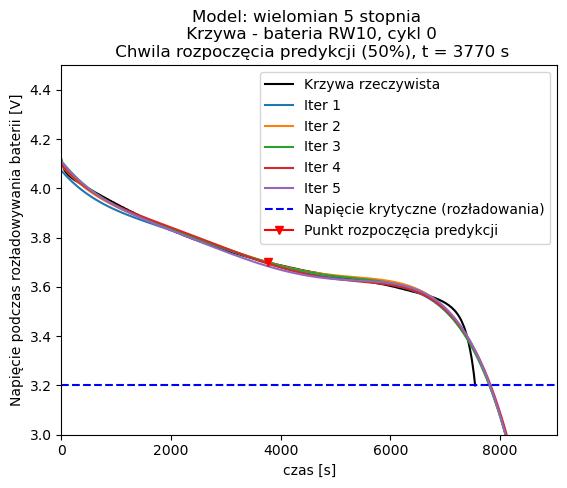

Optimal coeffs avg - curve 0:  [-4.49075518e-19  7.57089133e-15 -4.63234942e-11  1.33254753e-07
 -2.65516418e-04  4.09605702e+00]
Rank - curve 0:  22596.81921540075
Rozwiązania:
(7812.7061692991265+0j)
(4983.451758401836+3057.70313028432j)
(4983.451758401836-3057.70313028432j)
(-460.38592814665344+2694.2896775168106j)
(-460.38592814665344-2694.2896775168106j)
Rozwiązanie równania wielomianowego:  [7812.7061693]
Rzeczywista chwila czasu (na podstawie danych pomiarowych):  7542.95


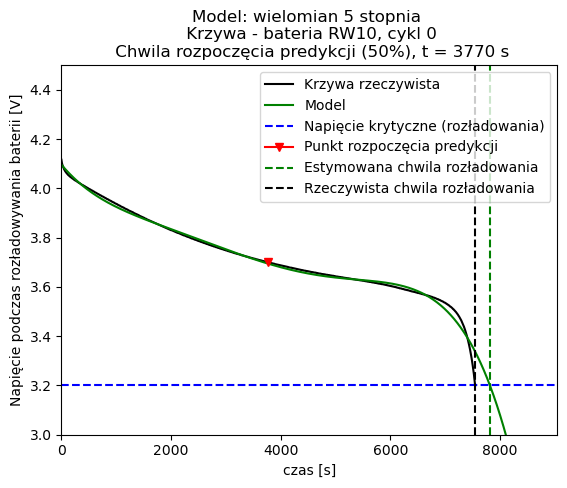

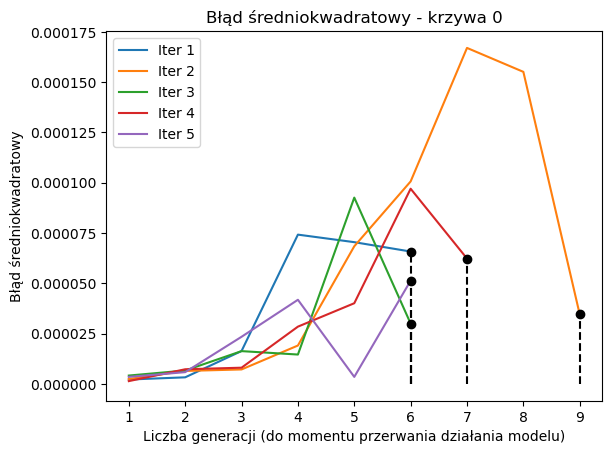

Chwila rozpoczęcia predykcji: 3770.04
------Wyniki na podstawie uśrednienia WSPÓŁCZYNNIKÓW WIELOMIANU z kolejnych iteracji dla danej krzywej------
Oszacowany czas pozostały do rozładowania:  [4042.6661693]
Rzeczywisty czas pozostały do rozładowania:  3772.91
Błąd względny: [7.14981723] %
Błąd bezwględny: [269.7561693] s
Dokładność: [92.85018277] %

Oszacowane czasy: [array([4037.06942425]), array([4041.2752493]), array([4032.67572898]), array([4056.91782884]), array([4045.36895252])]
Uśredniony oszacowany czas: 4042.6614367793395
Odchylenie standardowe oszacowanego czasu: 8.288327166386255 [s]

Błędy bezwględne: [array([264.15942425]), array([268.3652493]), array([259.76572898]), array([284.00782884]), array([272.45895252])]
Uśredniony błąd bezwględny: 269.7514367793394
Odchylenie standardowe oszacowanego błędu bezwzględnego: 8.288327166386255 [s]

------Wyniki na podstawie uśrednienia KRZYWYCH z kolejnych iteracji dla danej krzywej------
Oszacowany czas pozostały do rozładowania:  404

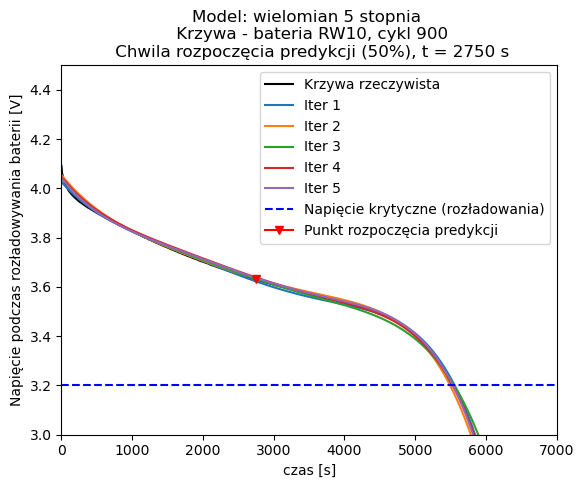

Optimal coeffs avg - curve 18:  [-1.50969180e-18  1.87945607e-14 -8.85009605e-11  2.05766730e-07
 -3.50038507e-04  4.04219558e+00]
Rank - curve 18:  18131.658227573345
Rozwiązania:
(5532.561590032759+0j)
(3791.41859507981+2471.5162624987515j)
(3791.41859507981-2471.5162624987515j)
(-333.06443797159733+2193.564499176822j)
(-333.06443797159733-2193.564499176822j)
Rozwiązanie równania wielomianowego:  [5532.56159003]
Rzeczywista chwila czasu (na podstawie danych pomiarowych):  5509.62


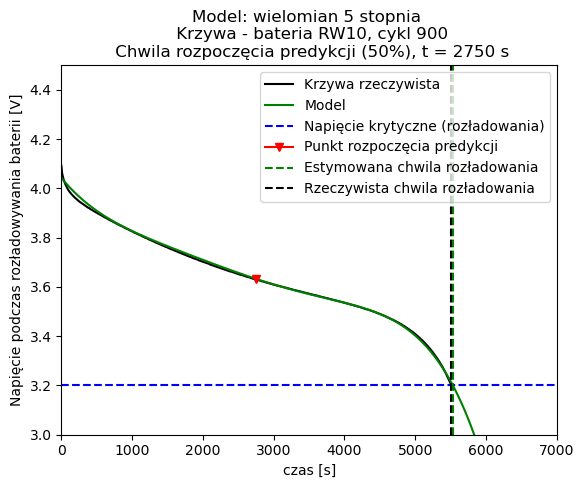

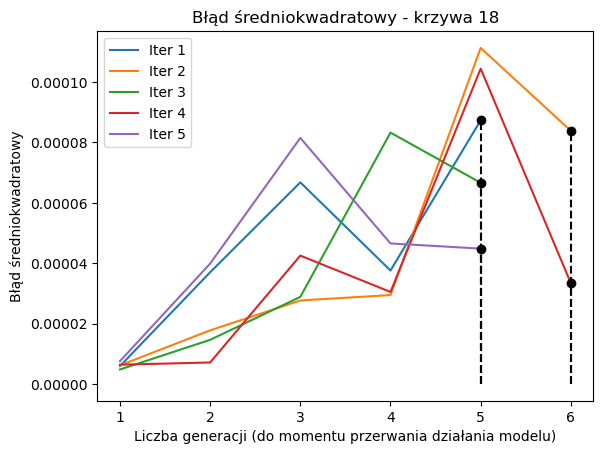

Chwila rozpoczęcia predykcji: 2750.04
------Wyniki na podstawie uśrednienia WSPÓŁCZYNNIKÓW WIELOMIANU z kolejnych iteracji dla danej krzywej------
Oszacowany czas pozostały do rozładowania:  [2782.52159003]
Rzeczywisty czas pozostały do rozładowania:  2759.58
Błąd względny: [0.83134354] %
Błąd bezwględny: [22.94159003] s
Dokładność: [99.16865646] %

Oszacowane czasy: [array([2807.51155001]), array([2743.73893947]), array([2803.20293727]), array([2780.87655207]), array([2781.9892721])]
Uśredniony oszacowany czas: 2783.463850183951
Odchylenie standardowe oszacowanego czasu: 22.604691769008074 [s]

Błędy bezwględne: [array([47.93155001]), array([15.84106053]), array([43.62293727]), array([21.29655207]), array([22.4092721])]
Uśredniony błąd bezwględny: 30.220274397455977
Odchylenie standardowe oszacowanego błędu bezwzględnego: 12.967089300369203 [s]

------Wyniki na podstawie uśrednienia KRZYWYCH z kolejnych iteracji dla danej krzywej------
Oszacowany czas pozostały do rozładowania:  2783.

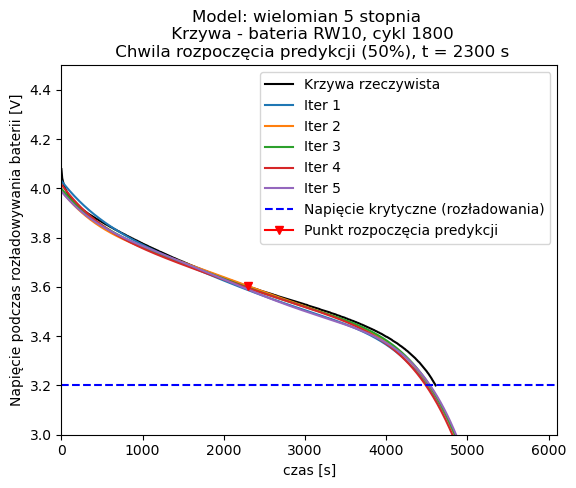

Optimal coeffs avg - curve 36:  [-3.16681585e-18  3.42710408e-14 -1.42473547e-10  2.89682566e-07
 -4.19357664e-04  4.00440087e+00]
Rank - curve 36:  12211.758357940653
Rozwiązania:
(4521.132539679963+0j)
(3368.276532405859+2135.635126993312j)
(3368.276532405859-2135.635126993312j)
(-217.88075088869962+1866.7210431303417j)
(-217.88075088869962-1866.7210431303417j)
Rozwiązanie równania wielomianowego:  [4521.13253968]
Rzeczywista chwila czasu (na podstawie danych pomiarowych):  4609.32


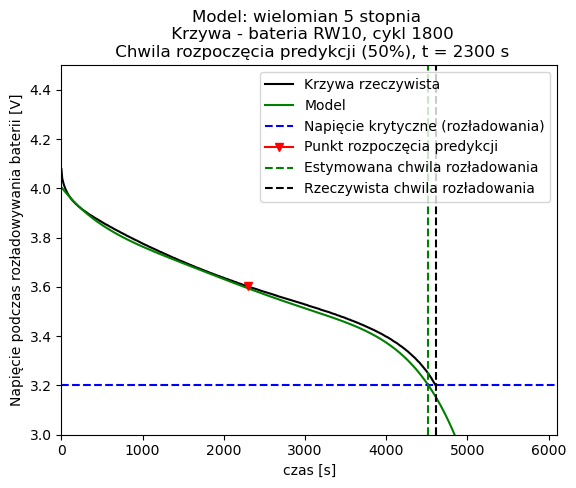

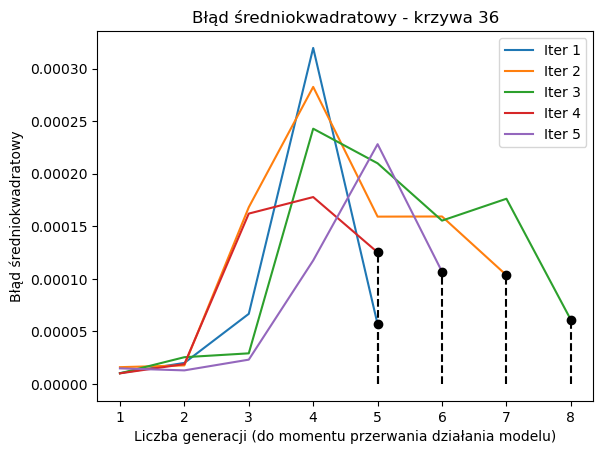

Chwila rozpoczęcia predykcji: 2300.04
------Wyniki na podstawie uśrednienia WSPÓŁCZYNNIKÓW WIELOMIANU z kolejnych iteracji dla danej krzywej------
Oszacowany czas pozostały do rozładowania:  [2221.09253968]
Rzeczywisty czas pozostały do rozładowania:  2309.2799999999997
Błąd względny: [3.81882926] %
Błąd bezwględny: [88.18746032] s
Dokładność: [96.18117074] %

Oszacowane czasy: [array([2208.97943645]), array([2229.00875818]), array([2235.61800032]), array([2189.78757589]), array([2242.26615866])]
Uśredniony oszacowany czas: 2221.131985899694
Odchylenie standardowe oszacowanego czasu: 19.228613629629255 [s]

Błędy bezwględne: [array([100.30056355]), array([80.27124182]), array([73.66199968]), array([119.49242411]), array([67.01384134])]
Uśredniony błąd bezwględny: 88.14801410030614
Odchylenie standardowe oszacowanego błędu bezwzględnego: 19.228613629629255 [s]

------Wyniki na podstawie uśrednienia KRZYWYCH z kolejnych iteracji dla danej krzywej------
Oszacowany czas pozostały do rozład

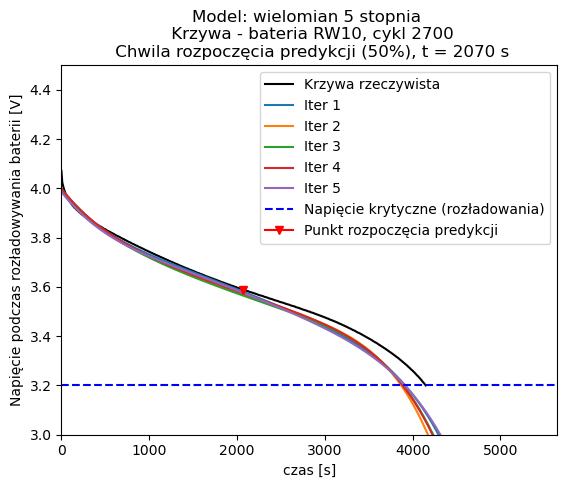

Optimal coeffs avg - curve 54:  [-3.72178573e-18  3.59297354e-14 -1.43139646e-10  2.96677277e-07
 -4.54074924e-04  3.99259663e+00]
Rank - curve 54:  30016.000307203543
Rozwiązania:
(3894.3186288152065+0j)
(3071.8425975226264+2285.5329525016996j)
(3071.8425975226264-2285.5329525016996j)
(-192.053506173222+1921.8154874866116j)
(-192.053506173222-1921.8154874866116j)
Rozwiązanie równania wielomianowego:  [3894.31862882]
Rzeczywista chwila czasu (na podstawie danych pomiarowych):  4149.21


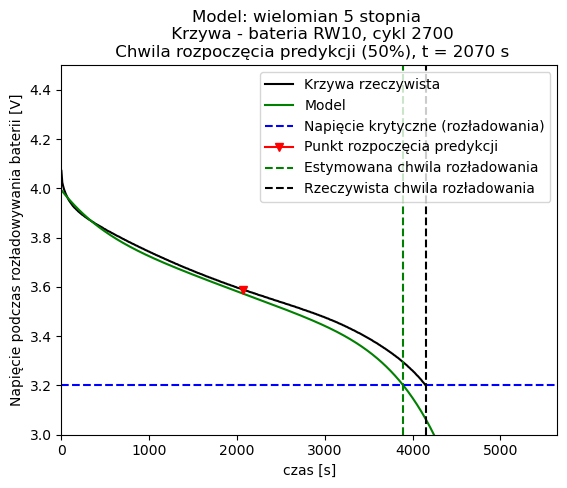

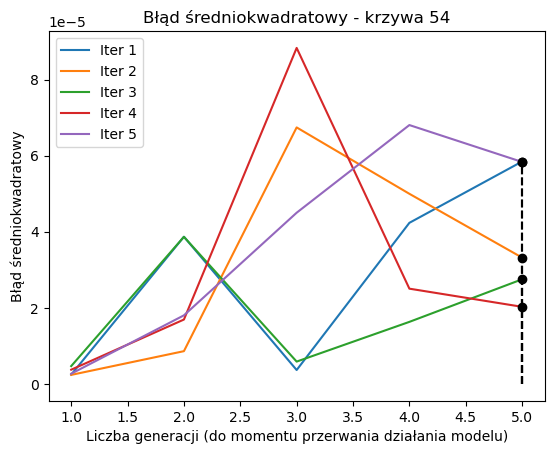

Chwila rozpoczęcia predykcji: 2070.04
------Wyniki na podstawie uśrednienia WSPÓŁCZYNNIKÓW WIELOMIANU z kolejnych iteracji dla danej krzywej------
Oszacowany czas pozostały do rozładowania:  [1824.27862882]
Rzeczywisty czas pozostały do rozładowania:  2079.17
Błąd względny: [12.25928477] %
Błąd bezwględny: [254.89137118] s
Dokładność: [87.74071523] %

Oszacowane czasy: [array([1846.04310181]), array([1800.20353294]), array([1825.14853455]), array([1817.64086723]), array([1841.39411044])]
Uśredniony oszacowany czas: 1826.086029396287
Odchylenie standardowe oszacowanego czasu: 16.581467776410477 [s]

Błędy bezwględne: [array([233.12689819]), array([278.96646706]), array([254.02146545]), array([261.52913277]), array([237.77588956])]
Uśredniony błąd bezwględny: 253.08397060371308
Odchylenie standardowe oszacowanego błędu bezwzględnego: 16.581467776410477 [s]

------Wyniki na podstawie uśrednienia KRZYWYCH z kolejnych iteracji dla danej krzywej------
Oszacowany czas pozostały do rozładowani

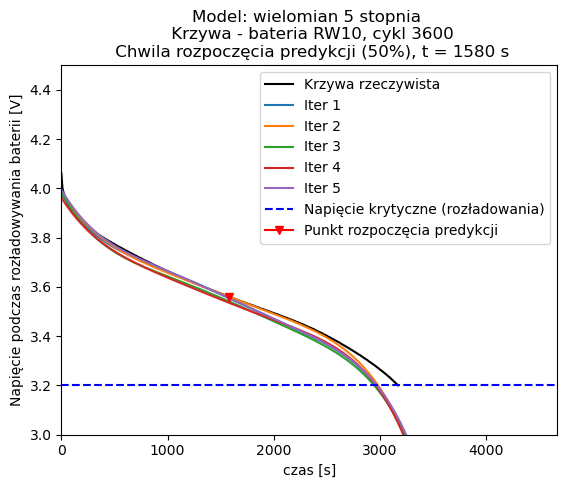

Optimal coeffs avg - curve 72:  [-2.29917400e-17  1.78901267e-13 -5.41223698e-10  7.89548429e-07
 -7.32141859e-04  3.98099600e+00]
Rank - curve 72:  8013.39469447115
Rozwiązania:
(2967.9826588636834+0j)
(2415.217365748092+1433.132916921908j)
(2415.217365748092-1433.132916921908j)
(-8.65349562164377+1204.5828901351947j)
(-8.65349562164377-1204.5828901351947j)
Rozwiązanie równania wielomianowego:  [2967.98265886]
Rzeczywista chwila czasu (na podstawie danych pomiarowych):  3173.54


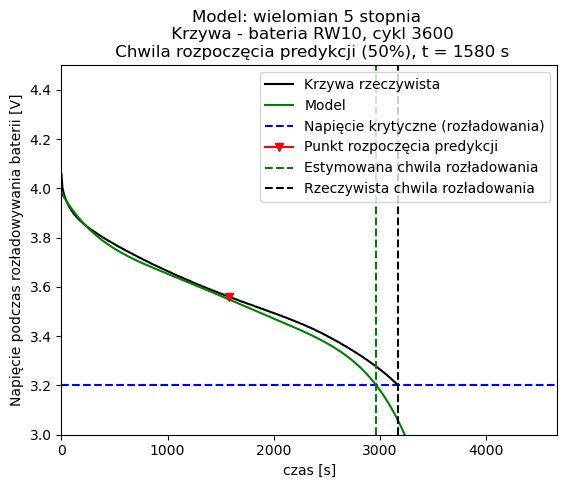

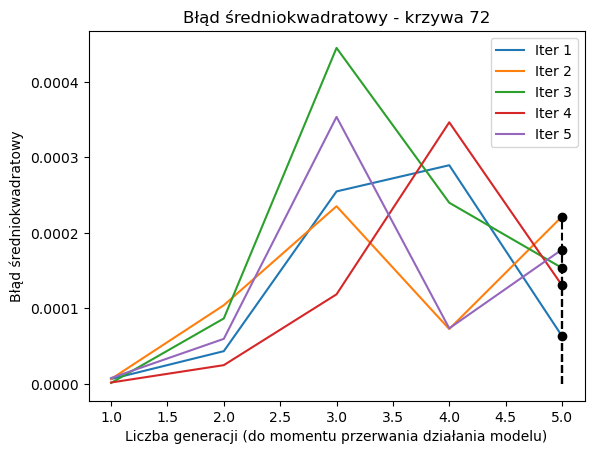

Chwila rozpoczęcia predykcji: 1580.04
------Wyniki na podstawie uśrednienia WSPÓŁCZYNNIKÓW WIELOMIANU z kolejnych iteracji dla danej krzywej------
Oszacowany czas pozostały do rozładowania:  [1387.94265886]
Rzeczywisty czas pozostały do rozładowania:  1593.5
Błąd względny: [12.89973901] %
Błąd bezwględny: [205.55734114] s
Dokładność: [87.10026099] %

Oszacowane czasy: [array([1387.64353905]), array([1403.94747117]), array([1367.55888967]), array([1384.15877643]), array([1393.74350995])]
Uśredniony oszacowany czas: 1387.4104372526494
Odchylenie standardowe oszacowanego czasu: 11.985765530401727 [s]

Błędy bezwględne: [array([205.85646095]), array([189.55252883]), array([225.94111033]), array([209.34122357]), array([199.75649005])]
Uśredniony błąd bezwględny: 206.08956274735056
Odchylenie standardowe oszacowanego błędu bezwzględnego: 11.985765530401727 [s]

------Wyniki na podstawie uśrednienia KRZYWYCH z kolejnych iteracji dla danej krzywej------
Oszacowany czas pozostały do rozładowani

In [15]:
# dodane też funkcję do wyświetlania wyników cząstkowych lub uśrednionych:
# cząstkowe - czyli dla konkretnej krzywej (po przejściu przez n iteracji)
# uśrednione - czyli po przejściu przez wszystkie krzywe, uzyskanie wszystkich wyników cząstkowych i obliczenie wyników końcowych (uśrednionych) poprzez uśrednienie błędów względnych, bezwzględnych 
# oraz dokładności z każdego wyniku cząstkowego, są to wyniki odnoszące się do ogólnej oceny działania modelu 
# i dla 2 metod wyznaczania czasu:
# na podstawie uśredniania krzywych - czyli w każdej iteracji dla danej krzywej liczymy szacowany czas a następnie uśredniamy go i mamy estymowany czas dla danej krzywej
# na podstawie uśredniania współczynników wielomianu - czyli bierzemy optymalne współczynniki dla danej krzywej z każdej iteracji i uśredniamy je (czyli bierzemy wszystkie współczynniki przy danym 
# członie wielomianu i je uśredniamy, robimy tak dla współczynnika przy każdym kolejnym członie danego wielomianu)
# Można model testować na 2 sposoby:
# albo bierzemy jedną krzywą i dla niej stosujemy model (krzywą testową biorę np. z innego pliku dla innej baterii, ale same baterie są tego samego typu ?)
# albo bierzemy kilka krzywych i uruchamiamy dla nich model (no tutaj jest to przydatne jeżeli chcemy bardziej ogólnie ocenić działanie modelu (bo jednak wykonujemy algorytm dla wielu krzywych
# (np. dla 10) i wyniki otrzymane dla poszczególnych krzywych uśredniamy więc daje to na pewno bardziej rzetelną ocenę modelu)

start_time = libs.time.time()
# wielomiany stopnia niższego niż 5 dają raczej lepsze wyniki jeżeli procent dostępnych danych do punktu predykcji jest mniekjszy niż 50 % ? 
data_percent = 0.5
iter_per_curve = 5
accuracy = []
# Method1 - to uśrednianie zestawów współczynników uzyskanych z n iteracji dla danej krzywej
# Method2 - to uśrednienie krzywych, dla krzywych z poszczególnych iteracji obliczamy szacowany czas pozostały do rozładowania i go uśredniamy, uśredniamy
# również błędy względne i bezwzlędne
absErrorsGlobal_Method1 = []
relErrorsGlobal_Method1 = []
absErrorsGlobal_Method2 = []
relErrorsGlobal_Method2 = []
est_time = 0
real_time_global = 0

test_n_curves = True
if test_n_curves:
    test_curves_indexes = random_indexes

print(test_curves_indexes)
for curve_index in test_curves_indexes:
    
    df_row, act_curve_index = dexpf.determineIndexForTestBattery(test_df_ref_discharge, curve_index, n_curves_test_battery) # tutaj robie cos takiego ze jako krzywe testowe przekazuje profile innej baterii (z innego pliku
    # ale o odpowiadających indeksach, bo profile dla tych różnych plików są dość zbliżone do siebie tak czy inaczej)
    print(f'Actual curve index: {act_curve_index}')
    time_full = df_row['relativeTime']
    voltage_full = df_row['voltage']
    arr_length = len(time_full)
    
    # wektory czasu i napięcia dla krzywej roboczej (krzywa dla której mamy współczynniki najlepszego dopasowania) - wykorzystywane przy obliczaniu granicznego rankingu
    proc_time_full = df_ref_discharge.loc[curve_index]['relativeTime'] # DODANE
    proc_voltage_full = df_ref_discharge.loc[curve_index]['voltage'] # DODANE
    
    proc_time_part = proc_time_full[0 : int(arr_length * data_percent)]
    proc_voltage_part = proc_voltage_full[0 : int(arr_length * data_percent)]
    
    time_full_enlarged = libs.np.array( libs.np.arange(time_full[0], time_full[-1]+1500, 10) ) # poszerzenie zakresu czasu wyświetlanego na wykresie
    # wektory czasu i napięcia dla krzywej testowej odpowiadające punktom pomiarowym dostępnym do punktu rozpoczęcia predykcji
    time_partial = time_full[0 : int(arr_length * data_percent)]
    voltage_partial = voltage_full[0 : int(arr_length * data_percent)]
    best_fit_coeffs = allSetsOfCoeffs[curve_index]
    #best_fit_coeffs = libs.np.polyfit(time_partial, voltage_partial, polynomial_degree)
    print(f"Best fit coeffs: {best_fit_coeffs}")
    # curve_grp = grpc.specifyGroup(act_curve_index)
    curve_grp = grpc.specifyGroup(SOHs[act_curve_index])
    print(f"Curve group: {curve_grp}")
    optimal_coeffs_list = []
    rank_list = []
    num_gens_list = []
    mse_lists = []
    estimated_times_list = []
    abs_errors = []
    rel_errors = []
    real_time = 0
    
    libs.plt.plot(time_full, voltage_full, color='k', label='Krzywa rzeczywista')
    libs.plt.ylim([3, 4.5])
    libs.plt.xlim([0, max(df_row['relativeTime']) + 1500])
    # można zwiększyć liczność populacji (na pewno jeżeli testujemy dla pojedynczej krzywej), jeżeli bierzemy na raz np. 10 krzywych to można troche zmnieszyc populację zeby szybciej się wszystko
    # wykonało, minimalna liczba generacji jako 10 chyba jest OK
    for i in range(1, iter_per_curve+1):
        print(f"Iter {i}")
        # modify_n_best - gdy jest False to najlepsze osobniki z danej generacji przechodzą do następnej bez zmian (czyli bez mutacji i krzyżowania), mutacji i krzyżowania używamy wtedy do dopełnienia
        # nowej populacji na podstawie tych najlepszych osobników, gdy jest True, to modyfikujemy te najlepsze osobniki i dodajemy je do następnej generacji
        rank, optimal_coeffs, mse_list, num_gens = gen.EvolutionaryModel(proc_time_full, proc_voltage_full, time_partial, voltage_partial, coeffs_ranges, best_fit_coeffs, coeffs_ranges_groups, curve_grp,
                                         grouping_profiles=True,
                                         n_pop=10000, 
                                         n_gens=200, 
                                         n_best=200,
                                         part_time_vector_size=100,
                                         mutation_rate=0.03,
                                         mutation_with_prob=False,
                                         crossover=True,
                                         random_crossover_point=True,
                                         limit_rank_threshold=0.5, # ograniczenie progu rankingu
                                         modify_n_best=True, # czy dokonujemy mutacji i selekcji na najlepszych osobnikach z poprzedniej generacji, jak jest True to jest bardziej stabilne, rozwiązania są 
                                                             # dość dobre, i przede wszystkich program o wiele szybciej się wykonuje
                                         min_gens_to_complete=5, # minimalna liczba generacji do przejścia dla danego przypadku, 10 wydaje się ok
                                         avgBestCoeffs=False,
                                         n_best_best=3)
        # best_fit_coeffs = optimal_coeffs
        model = libs.np.poly1d(optimal_coeffs)
        model_values = model(time_full_enlarged)
        # ngr.drawRealCurveAndModel(polynomial_degree, act_curve_index, df_row, time_full_enlarged, model_values, x_prediction_start=time_partial[-1], y_prediction_start=voltage_partial[-1])
        print(optimal_coeffs)
        libs.plt.plot(time_full_enlarged, model_values, label=f'Iter {i}')
        optimal_coeffs_list.append(optimal_coeffs)
        rank_list.append(rank)  
        num_gens_list.append(list(range(1, num_gens+1)))
        mse_lists.append(mse_list)
        # model = libs.np.poly1d(optimal_coeffs)
        # model_values = model(time_full_enlarged)
        estimated_time, real_time, abs_err, rel_err, _  = ngr.findRemainingTime(optimal_coeffs, time_full, time_partial, return_values_only=True)
        real_time_global = real_time
        estimated_times_list.append(estimated_time)
        abs_errors.append(abs_err)
        rel_errors.append(rel_err)
        print(f'Num gens: {num_gens}\n')
    crit_voltage = 3.2
    x = libs.np.linspace(0, 10000, 10)
    y = crit_voltage * libs.np.ones(len(x))
    libs.plt.plot(x, y, label="Napięcie krytyczne (rozładowania)", color='blue', linestyle='--')
    libs.plt.plot(time_partial[-1], voltage_partial[-1], label='Punkt rozpoczęcia predykcji', marker='v', color='red')
    libs.plt.xlabel('czas [s]')
    libs.plt.ylabel('Napięcie podczas rozładowywania baterii [V]')
    libs.plt.legend(loc='upper right')
    libs.plt.title(f'Model: wielomian {polynomial_degree} stopnia \n Krzywa - bateria {test_battery_name}, cykl {(act_curve_index) * 50}\n Chwila rozpoczęcia predykcji ({int(data_percent*100)}%), t = {int(time_partial[-1])} s')
                   
    libs.plt.show()
    # Uśrednianie odpowiednich wartości dla metody uśrednienia krzywych z wykonanych iteracji     
    est_time = libs.np.array(estimated_times_list).mean()
    absErrorAvgCurves = libs.np.array(abs_errors).mean()
    relErrorAvgCurves = libs.np.array(rel_errors).mean()

    absErrorsGlobal_Method2.append(abs(est_time - real_time))
    relErrorsGlobal_Method2.append(abs(est_time - real_time) / real_time)
    
    # print(f"Optimal coeffs avg - curve {act_curve_index}: ", optimal_coeffs)
    # Uśrednienie współczynników wielomianu z 5 wykonanych iteracji dla danej krzywej
    rank_avg = libs.np.array(rank_list).mean()
    rank_avg_arr = rank_avg * libs.np.ones(len(rank_list))
    weights = 1 / abs(libs.np.array(rank_list) - rank_avg_arr)
    
    optimal_coeffs_avg = libs.np.mean( libs.np.array(optimal_coeffs_list), axis=0 )
    # obliczanie średniej ważonej zamiast zwykłej średniej
    # optimal_coeffs_avg = libs.np.average(libs.np.array(optimal_coeffs_list),
    #                                    axis=0, 
    #                                    weights = weights) # libs.np.array([(1/rel_err)**2 for rel_err in rel_errors]).flatten())
   
    print(f"Optimal coeffs avg - curve {act_curve_index}: ", optimal_coeffs_avg )
    print(f"Rank - curve {act_curve_index}: ", libs.np.array(rank_list).mean())
    # print(f"Num gens avg - curve {act_curve_index}:", np.array(num_gens_list).mean())
    model = libs.np.poly1d(optimal_coeffs_avg)
    model_values = model(time_full_enlarged)
    
    # Rozwiązanie równania wielomianowego
    estimated_time, real_time, abs_err, rel_err, is_solution = ngr.findRemainingTime(optimal_coeffs_avg, time_full, time_partial)
    

    ngr.drawRealCurveAndModel(polynomial_degree, f'- bateria {test_battery_name}, cykl {(act_curve_index) * 50}\n Chwila rozpoczęcia predykcji ({int(data_percent*100)}%), t = {int(time_partial[-1])} s',
                              df_row, time_full_enlarged, model_values, x_prediction_start=time_partial[-1], y_prediction_start=voltage_partial[-1])
    libs.plt.axvline(x=estimated_time + time_partial[-1], color='g', linestyle='--', label='Estymowana chwila rozładowania')
    libs.plt.axvline(x=real_time + time_partial[-1], color='k', linestyle='--', label='Rzeczywista chwila rozładowania')
    libs.plt.legend(loc='upper right')
    libs.plt.show()
    for index, gens in enumerate(num_gens_list):
        #drawFunction(list(range(1, num_gens+1)), mse_list, xlabel='Liczba generacji (do momentu przerwania działania modelu)', ylabel='Błąd średniokwadratowy',
        #                                                                                          title=f'Błąd średniokwadratowy - krzywa {act_curve_index}')
        dexpf.drawFunction(gens, mse_lists[index], label=f'Iter {index+1}', xlabel='Liczba generacji (do momentu przerwania działania modelu)', ylabel='Błąd średniokwadratowy',
                                                                                          title=f'Błąd średniokwadratowy - krzywa {act_curve_index}')
    # libs.plt.xticks(range(1, len( max(num_gens_list, key=len) ) + 2))
    libs.plt.show()
    
    # Wyniki dla uśrednienia WSPÓŁCZYNNIKÓW WIELOMIANU
    print(f'Chwila rozpoczęcia predykcji: {time_partial[-1]}')
    ngr.printResults(avgd_curves_or_coeffs='coeffs', avgd_or_partial_results='part', est_time=estimated_time, real_time=real_time, rel_error=rel_err, abs_error=abs_err)
    print()
    
    # Wyniki dla uśrednienia KRZYWYCH
    print(f'Oszacowane czasy: {estimated_times_list}')
    print(f'Uśredniony oszacowany czas: {libs.np.array(estimated_times_list).mean()}' )
    print(f'Odchylenie standardowe oszacowanego czasu: {libs.np.array(estimated_times_list).std()} [s]\n')
    print(f'Błędy bezwględne: {abs_errors}')
    print(f'Uśredniony błąd bezwględny: {libs.np.array(abs_errors).mean()}' )
    print(f'Odchylenie standardowe oszacowanego błędu bezwzględnego: {libs.np.array(abs_errors).std()} [s]\n')
    ngr.printResults(avgd_curves_or_coeffs="curves", avgd_or_partial_results="part", est_time=est_time, real_time=real_time,
                     rel_error=abs(est_time - real_time) / real_time,
                     abs_error=abs(est_time - real_time) )
        
    relErrorsGlobal_Method1.append( (rel_err) )
    absErrorsGlobal_Method1.append(abs_err)
    # print( f"Dokładność: {accuracy[-1]} %" )
    # print( f"Błąd względny: {rel_errors[-1]} %" )
    # print( f"Błąd bezwzględny: {abs_errors[-1]} s" )
    print('\n\n')
    
# OTRZYMANE WYNIKI    
end_time = libs.time.time()
print(rel_errors)
execution_time = end_time - start_time
print(f'Na podstawie danych z baterii {battery_name}')
print(f'Bateria testowa: {test_battery_name}')
print(f'Execution time {execution_time}')
# Wyniki otrzymane dla metody 1 (uśrednianie współczynników)
avgRelErrorGlobal_Method1 = libs.np.array( relErrorsGlobal_Method1 ).mean()
avgAbsErrorGlobal_Method1 = libs.np.array( absErrorsGlobal_Method1 ).mean()
relErrorStdDev_Method1 = libs.np.array(relErrorsGlobal_Method1).std()
# avg_accuracy = libs.np.array( accuracy ).mean()
ngr.printResults(avgd_curves_or_coeffs='coeffs', avgd_or_partial_results='avg', avg_rel_error=avgRelErrorGlobal_Method1, avg_abs_error=avgAbsErrorGlobal_Method1)
print(f'Odchylenie standardowe błędu względnego - UŚREDNIANIE WSPÓŁCZYNNIKÓW: {relErrorStdDev_Method1 * 100}')

print()
# Wyniki otrzymane dla metody 2 (uśrednianie krzywych)
avgRelErrorGlobal_Method2 = libs.np.array(relErrorsGlobal_Method2).mean() #* 100
avgAbsErrorGlobal_Method2 = libs.np.array(absErrorsGlobal_Method2).mean()
relErrorStdDev_Method2 = libs.np.array(relErrorsGlobal_Method2).std()
ngr.printResults(avgd_curves_or_coeffs='curves', avgd_or_partial_results='avg', avg_rel_error=avgRelErrorGlobal_Method2, avg_abs_error=avgAbsErrorGlobal_Method2)
print(f'Odchylenie standardowe błędu względnego - UŚREDNIANIE KRZYWYCH: {relErrorStdDev_Method2 * 100}')

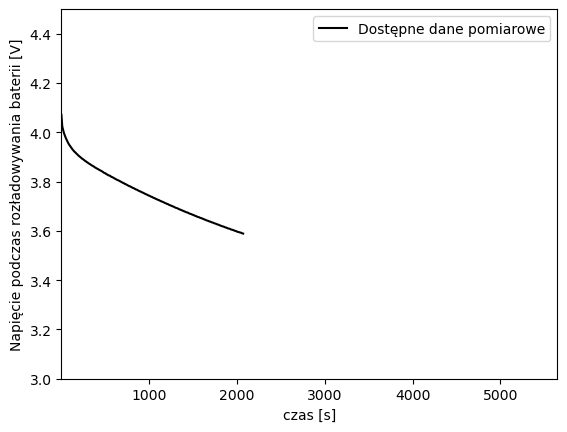

In [16]:
# Obrazowa postać wejścia do realizowanego algorytmu (ograniczona część dostępnych początkowych punktów pomiarowych)
num_points = len(test_df_ref_discharge.loc[54]['relativeTime'])
time_full = test_df_ref_discharge.loc[54]['relativeTime']
time_full_enlarged = libs.np.array( libs.np.arange(time_full[0], time_full[-1]+1500, 10) )
voltage_full = test_df_ref_discharge.loc[54]['voltage']
time_part = test_df_ref_discharge.loc[54]['relativeTime'][0 : int(0.5 * num_points)]
voltage_part = test_df_ref_discharge.loc[54]['voltage'][0 : int(0.5 * num_points)]

libs.plt.plot(time_part, voltage_part, label='Dostępne dane pomiarowe', color='k')
# plt.plot(time_full, np.ones(len(time_full)) * 3.2)
libs.plt.xlabel('czas [s]')
libs.plt.xlim(min(time_full), max(time_full) + 1500)
libs.plt.ylim(3, 4.5)
libs.plt.ylabel('Napięcie podczas rozładowywania baterii [V]')
libs.plt.legend()
libs.plt.show()

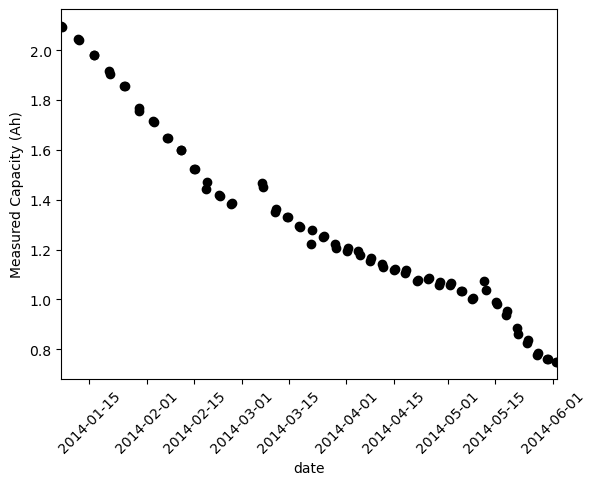

80


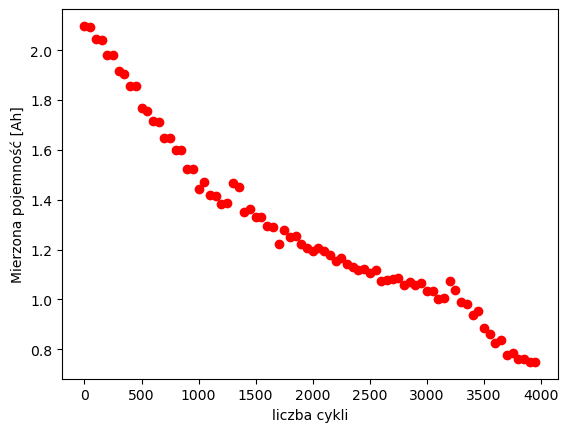

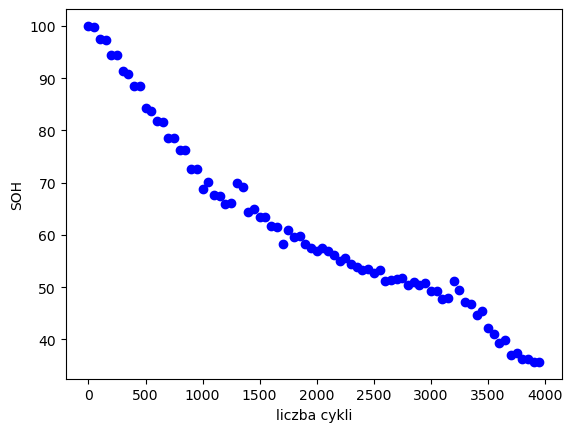

In [18]:
# Zależności pojemności w czasie i dla liczby cykli oraz zależność parametru SOH od liczby cykli dla przykładowego
# pliku (jednej z baterii danego typu)
cycles, Capacity = dexpf.MeasuredCapacity(df_ref_discharge, n_curves)

coeffs = libs.np.polyfit(cycles, Capacity, 1)

line = libs.np.poly1d(coeffs)

x_model = cycles
y_model = line(x_model)

# dopasowanie prostej do pomiarów pojemności w zależności od liczby cykli 
libs.plt.show()